#### AMOC references

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019RG000644

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015RG000493

when a single-value AMOC number is required, the maximum at 26N is meant. 


## process annotation

`module add gcc/10.3.0`

`module add netcdf/4.7.4/gcc`

toolbox is here: `cd /gpfs/home/mep22dku/cdftools`

need to symlink orca meshmask:

do  `bash link_tommask.sh`

bashscript for running the toolbox is in `overturning_TOM.sh` in the toolbox directory (change model name!)

it puts results in `/gpfs/home/mep22dku/cdftools/MOCresults` with name of run in filename

In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [14]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [25]:


def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist


GEA0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_GEA0')


#/gpfs/home/mep22dku/cdftools/MOCresults/TOM12_TJ_GEA0_1m_19400101_19401231_MOC.nc

In [26]:
tmoc = xr.open_mfdataset(GEA0_moc)

In [27]:
tmoc

<xarray.Dataset>
Dimensions:       (depthw: 31, time_counter: 768, x: 1, y: 149)
Coordinates:
  * depthw        (depthw) float32 -0.0 -10.000015 ... -4500.0215 -5000.0
  * time_counter  (time_counter) object 1959-01-16 12:00:00 ... 2022-12-16 12...
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 1), meta=np.ndarray>
    nav_lat       (time_counter, y, x) float32 dask.array<chunksize=(12, 149, 1), meta=np.ndarray>
    zomsfglo      (time_counter, depthw, y, x) float32 dask.array<chunksize=(12, 31, 149, 1), meta=np.ndarray>
    zomsfatl      (time_counter, depthw, y, x) float32 dask.array<chunksize=(12, 31, 149, 1), meta=np.ndarray>
    zomsfinp      (time_counter, depthw, y, x) float32 dask.array<chunksize=(12, 31, 149, 1), meta=np.ndarray>
    zomsfind      (time_counter, depthw, y, x) float32 dask.array<chunksize=(12, 31, 149, 1), meta=np.ndarray>
    zomsfpac      (time_counter, depthw, y, x) float32 dask.array<chunksize=(12, 31, 149, 1), meta=np.ndarray>
    zomsfinp0     (time_counter, depthw, y, x) float32 dask.array<chunksize=(12, 31, 149, 1), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation

In [35]:
atl_at_26 = np.squeeze(tmoc.zomsfatl.sel(y=94).values)

In [36]:
np.shape(atl_at_26)

(768, 31)

In [39]:
atl_at_26


max_atl = np.zeros(768)

for i in range(0,len(max_atl)):
    max_atl[i] = np.nanmax(atl_at_26[i,:])

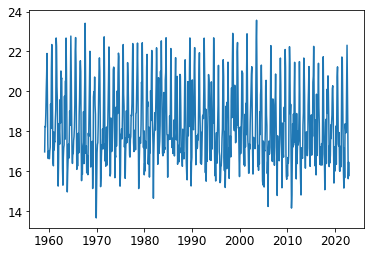

In [41]:
nicetime  = tmoc.indexes['time_counter'].to_datetimeindex()
plt.plot(nicetime, max_atl)

In [19]:
w = xr.open_dataset('/gpfs/home/mep22dku/cdftools/MOCresults/TOM12_TJ_GEA0_1m_19780101_19781231_MOC.nc')
w

<xarray.Dataset>
Dimensions:       (depthw: 31, time_counter: 12, x: 1, y: 149)
Coordinates:
  * depthw        (depthw) float32 -0.0 -10.000015 ... -4500.0215 -5000.0
  * time_counter  (time_counter) object 1978-01-16 12:00:00 ... 1978-12-16 12...
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    zomsfglo      (time_counter, depthw, y, x) float32 ...
    zomsfatl      (time_counter, depthw, y, x) float32 ...
    zomsfinp      (time_counter, depthw, y, x) float32 ...
    zomsfind      (time_counter, depthw, y, x) float32 ...
    zomsfpac      (time_counter, depthw, y, x) float32 ...
    zomsfinp0     (time_counter, depthw, y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation